In [29]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cbook as cbook
import mne
from matplotlib.widgets import Slider
import pandas as pd

In [45]:
path = 'S201R01_t000.edf'
# data = np.fromfile(path, dtype=float)
# data.shape
data = mne.io.read_raw_edf(path)
df = data.to_data_frame()
df.columns
df

Extracting EDF parameters from /Users/volume999/Documents/PersonalProjects/Hackathon/Google MedTech/Project/GoogleBrainCaptureHackathon/S201R01_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


,time,Fp1,Fp2,F7,F3,Fz,F4,F8,T7,C3,Cz,C4,T8,P7,P3,Pz,P4,P8,O1,O2
0,0.000000,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630
1,0.003906,-32.755485,-10.063014,-129.532199,20.416088,-27.638556,-5.613510,-58.340134,-52.333303,50.895191,21.750940,-24.301428,-14.957469,-12.955192,-4.501134,274.037821,-17.849647,67.580832,19.526188,-65.904291
2,0.007812,-33.645386,-17.849647,-268.579201,15.966584,-87.706861,28.425196,-69.018943,-117.741013,60.684100,16.189060,-61.677262,-17.849647,-18.517072,50.227766,424.431058,-23.856477,182.155562,15.744109,-79.475278
3,0.011719,-23.634002,-20.296874,-356.011956,15.076684,-131.089525,57.346972,-1.164006,-158.898926,60.684100,12.851932,-87.261910,-17.182221,-15.624895,96.502608,308.966428,-17.404696,256.239804,15.521634,3.285498
4,0.015625,-27.193605,16.411535,-443.889662,47.780538,-152.892095,63.798753,33.542125,-184.261099,92.498054,45.333311,-104.170026,0.615795,5.510250,108.738744,121.642306,-0.719056,290.278511,47.558063,37.546679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379387,1481.980469,-0.274106,-0.051630,-0.274106,-0.051630,-0.051630,-0.051630,-0.051630,-0.274106,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630
379388,1481.984375,-0.274106,-0.051630,-0.274106,-0.051630,-0.051630,-0.051630,-0.051630,-0.274106,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630
379389,1481.988281,-0.274106,-0.051630,-0.274106,-0.051630,-0.051630,-0.051630,-0.051630,-0.274106,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630
379390,1481.992188,-0.051630,-0.274106,-0.274106,-0.051630,-0.051630,-0.051630,-0.051630,-0.496581,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630,-0.051630


In [38]:
!pip install bokeh

In [51]:
def visualize_plot(df):
    # df = data.to_data_frame()
    # np.random.seed(0)
    # time = np.linspace(0, 100, 1000)  # 1000 time points from 0 to 100 seconds
    channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'O2']
    # data = np.random.randn(1000, len(channels))  # Random data for 19 channels
    # df = pd.DataFrame(data, columns=channels)
    # df['time'] = time

    # Create the main figure and axis
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.subplots_adjust(bottom=0.25)

    # Plot configuration
    ax.set_xlabel('Time (s)')
    ax.set_xlim(0, 1000)  # Initial x-axis limit

    # Calculate the vertical displacement and set the vertical limits
    n_rows = len(channels)
    print(df[channels])
    dy = (df[channels].min().min() - df[channels].max().max()) * 0.7
    ax.set_ylim(-dy, n_rows * dy)

    # Plot each channel with an offset
    for i, channel in enumerate(channels):
        ax.plot(df['time'], df[channel] + i * dy, label=channel)

    # Set y-ticks to correspond to each channel, adjusting for the offsets
    ax.set_yticks(np.arange(0, n_rows * dy, dy))
    ax.set_yticklabels(channels)

    # Add slider for adjusting x-axis range
    slider_ax = plt.axes([0.2, 0.1, 0.65, 0.03], facecolor='lightgoldenrodyellow')
    slider = Slider(slider_ax, 'Time', df['time'].min(), df['time'].max() - 10, valinit=0)

    # Update function for the slider
    def update(val):
        start_time = slider.val
        end_time = start_time + 10  # Adjust the window size as needed
        ax.set_xlim(start_time, end_time)
        fig.canvas.draw_idle()

    slider.on_changed(update)

    plt.legend()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


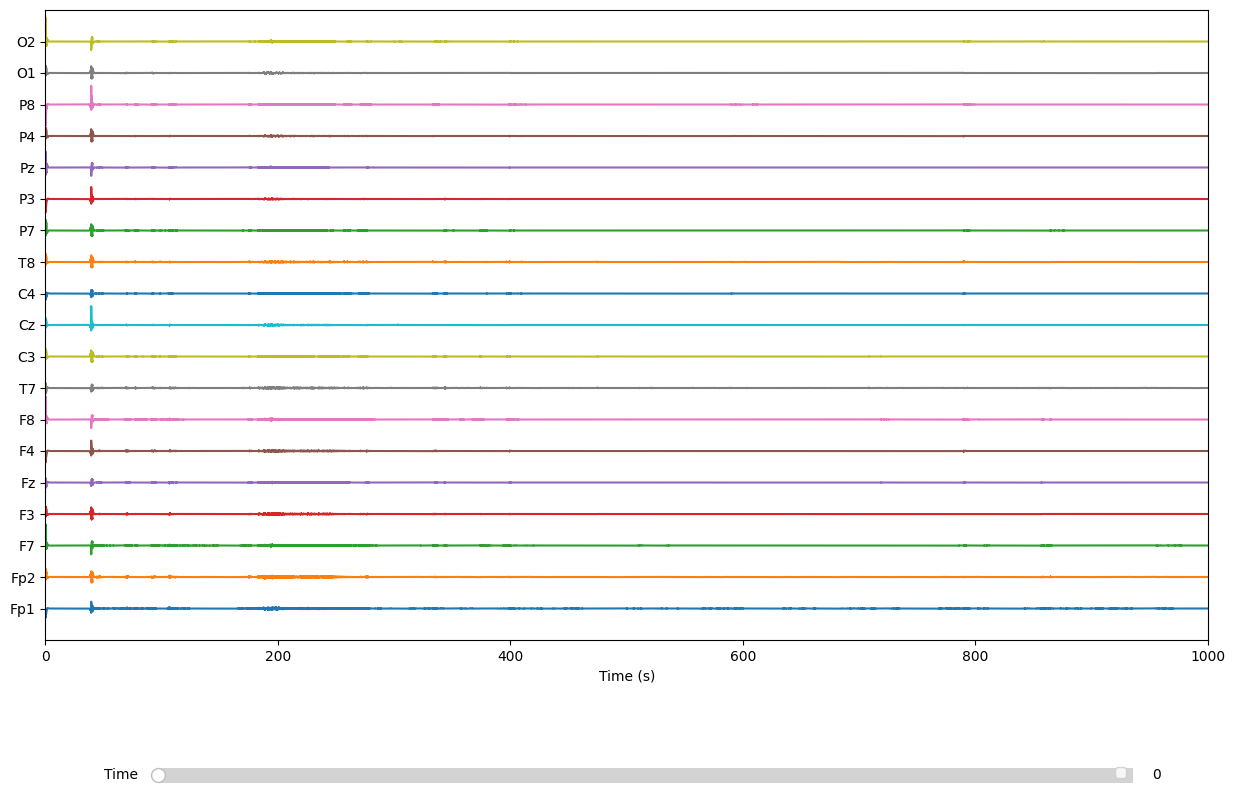

In [52]:
visualize_plot(df)